# Lecture 11

## Lexical Semantics - Word Representations and Static Word Embeddings

### Semantic Similarity and Relatedness
* Certain words are similar, even if they are not exact synonyms
    * "fast" is similar to "rapid" and "speed"
    * "fast" and "rapid" are adjectives, but "speed" is a noun, and despite these differences the words are used in a similar context
* Relatedness: words like "cat" and "dog" are more related than words like "cat" and "table"

### Supervised Learning
* Can utilize **bag-of-words representation** for a document/corpus, and **single word representation/one-hot vector** to represent a single word as input
* However, these approaches do not reflect the meanings of the words represented, or contain any solutions for words that are not in the lexicon

### Dense Word Representations
* Distributional Semantics ("count based" approaches) -- interpret the meaning of a word based on the context (words are similar if they appear in similar contexts)
    * Based in linguistic theory ("distributional hypothesis")
    * Context is symbolic, dimensions are interpretable
* Distributed Semantics
    * Based in connectionist approaches
    * Dimensions are not necessarily interpretable

### Cosine Similarity
* Can measure the similarity of different words using the dot product, or cosine similarity:
$$ \text{sim}_{\cos} (x, y) = \frac{x \cdot y}{|x||y|}
$$

### Clustering and Semantic Maps
* Distributional Similarity / Distance can be used to:
    * Find nearest neighbors (similar words)
    * Cluster related words into hierarchical categories
    * Construct semantic maps
* Cluster words with high cosine similarity
* Use a distributional semantic model (matrix M) to represent the similarity of words in each row with words in each column

### Semantic Similarity vs. Relatedness
* Semantic Relatedness **(syntagmatic relatedness)**:
    * Words that occur nearby each other, but are not necessarily similar
    * function (car - drive), meronymy (car - tire), location (car - road), attribute (car - fast)
* Semantic Similarity **(paradigmatic relatedness)**:
    * Can typically substitute on word for another
    * synonyms (car - automobile), hypernym (car - vehicle: can substitute vehicle for car, but not necessarily car for vehicle), sibling-hyponyms (car - truck - van - bike)

### Term Weighting
* Additional weight should be given to context words that are more relevant in characterizing the meaning of a word
* Example: "barking" is more relevant to the meaning of dog than the word "the", but "the" may be seen more often than "barking"

### TF * IDF
* Term Frequency and Inverse Document Frequency
* Term Frequency: how often does the term $t$ appear in the context window of the target word?
$$ tf_{t, d} = count(t, d) $$

* Inverse Document Frequency: for how many words does $t$ appear in the context window
$$ idf_{t, D} = \log \frac{|D|}{|\{d \in D, count(t, d) > 0\} | } $$

* IDF assigns a heavier weight for context words that do not appear frequently (ex. "bark" assigned a heavier weight than "the" which is seen frequently as a context word with many target words)
* Multiply the frequencies: $ tf_{t, d} \cdot idf_{t, D} $ 

### Sparse vs. Dense Vectors
* Co-occurrence matrices may require a lot of storage/high cost because the matrix is extremely big and contains a lot of 0 entries (sparse)
    * May be inconvenient to store, lead to slow computation
* **Word embeddings** are representations of words in a low-dimensional, dense vector space (two approaches to converting large, sparse co-occurrence matrices to dense vectors):
    * Use matrix decomposition on co-occurrence matrix (ex. singular value decomposition (SVD))
    * Learn embeddings by training a classifier on a distributional objective (such as language modeling)

### Learning Word Embeddings with Neural Networks (Word2Vec)
* The neural network should capture the relationship between a word and its context in running text
    * Two different objectives for learning embeddings:
        * **Skip-Gram model**: input is a single (target) word, goal is to predict a probability for each context word
        * **Continuous bag-of-words (BOW)**: input is a representation of the context window, goal is to predict a probability for each target word
    * Use either **Negative Sampling** or Hierarchical Softmax for training

### Skip-Gram Model
* Input: a single word in a vector representation
* Output: probability of seeing any single word within the context of the input (target) word
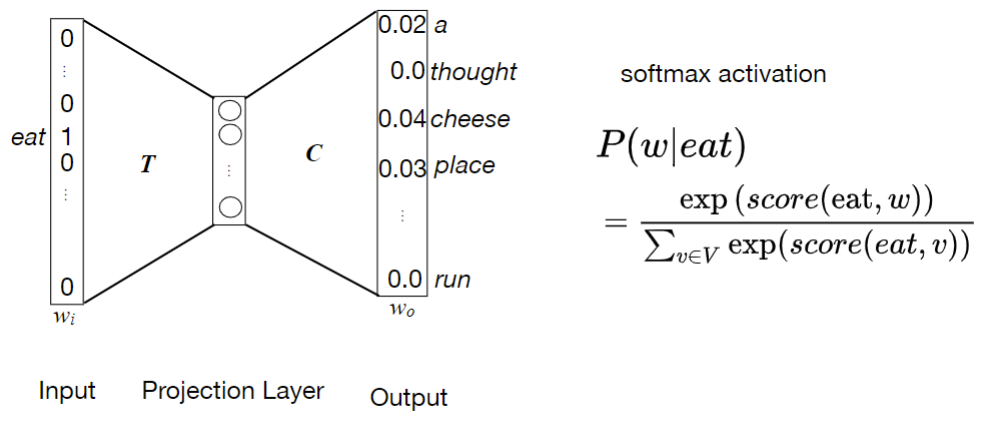


* There are two representations for each word (each word appears both as a target and context):
    * A row in the input matrix (target embedding)
    * A column in the output matrix (context embedding)

### Negative Sampling
* Repeatedly computing the softmax (over all words in the vocabulary) is expensive 
* Solution: consider a set of $D$ "correct" word context pairs $(w, c)$, and a set $\overline{D}$ of "incorrect" pairs
* Train a log-linear model to distinguish between good pairs and bad pairs, then compute $P(D | w, c)$ to determine whether a pair $(w, c)$ belongs in a set $D$
* Allows us to utilize logistic regression, instead of repeatedly using an expensive softmax calculation

### Continuous Bag-of-Words (CBOW)
* Input: Context words with a **shared weight matrix E**, which is averaged in the projection layer
* Output: probability that each word is the target word
* Calculate the word with the highest probability of being the target word
* Bag-of-words model, so it does not take into account the positioning of the target word within the context

### Analogy / Relational Similarity
* Certain items can be grouped together based on a particular relationship:
    * apple : tree, grape : vine (similar relationship -- apples grow on trees, grapes grow on vines)
    
* Parallelogram Method: can capture some analogies/relationships, but not always successful


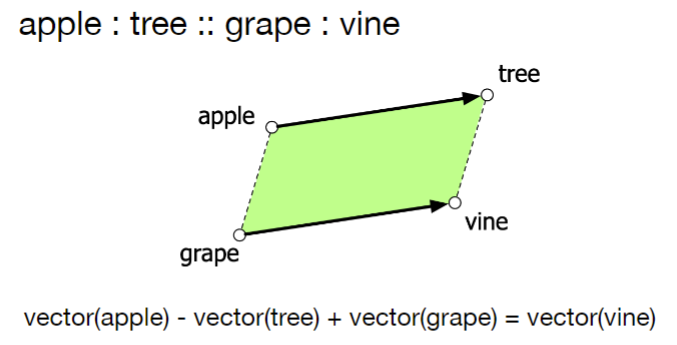

### Embeddings Reflect Cultural Biases
* Word vectors are trained on text written by humans, and thus will contain cultural biases
* Example: gender bias within word embeddings (father : doctor, woman : nurse)